In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import Input_Inv as Input

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
tickers = ['PHR.csv','VNIndex.csv']
port = pd.DataFrame()
for t in tickers:
    port[t] = Input.read_data(t)['Close']

In [14]:
port

,PHR.csv,VNIndex.csv
Date,,
2019-10-10,62600.0,987.38
2019-10-11,62500.0,991.84
2019-10-14,60700.0,993.57
2019-10-15,60000.0,993.05
2019-10-16,59300.0,994.46
...,...,...
2022-10-04,51500.0,1078.14
2022-10-05,52500.0,1104.26
2022-10-06,49900.0,1074.52


## Chuẩn hóa Variables

In [15]:
port.columns = ['PHR','VNIndex']
port

,PHR,VNIndex
Date,,
2019-10-10,62600.0,987.38
2019-10-11,62500.0,991.84
2019-10-14,60700.0,993.57
2019-10-15,60000.0,993.05
2019-10-16,59300.0,994.46
...,...,...
2022-10-04,51500.0,1078.14
2022-10-05,52500.0,1104.26
2022-10-06,49900.0,1074.52


In [16]:
port_return = np.log(port/port.shift(1))
port_return.dropna(inplace=True)
port_return

,PHR,VNIndex
Date,,
2019-10-11,-0.001599,0.004507
2019-10-14,-0.029223,0.001743
2019-10-15,-0.011599,-0.000524
2019-10-16,-0.011735,0.001419
2019-10-17,0.026624,-0.004677
...,...,...
2022-10-04,0.003891,-0.007669
2022-10-05,0.019231,0.023938
2022-10-06,-0.050792,-0.027301


In [17]:
port_Cov = port_return.cov()
port_Cov

,PHR,VNIndex
PHR,0.000722,0.000219
VNIndex,0.000219,0.000186


In [18]:
port_Corr = port_return.corr()
port_Corr

,PHR,VNIndex
PHR,1.000000,0.596669
VNIndex,0.596669,1.000000


In [19]:
ones_Corr = np.ones_like(port_Corr,dtype=bool)
ones_Corr

array([[ True,  True],
       [ True,  True]])

In [20]:
mask = np.triu(ones_Corr)
mask

array([[ True,  True],
       [False,  True]])

In [21]:
adjust_mask = mask[1:, :-1]
adjust_mask

array([[False]])

In [22]:
adjust_port_Corr = port_Corr.iloc[1:, :-1]

Text(0.5, 1.0, 'Tương quan giữa từng loại tài sản trong danh mục\n')

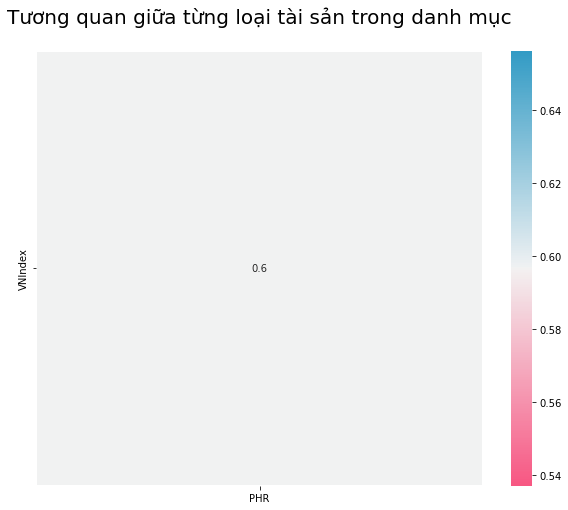

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjust_port_Corr, mask=adjust_mask, annot=True, cmap=cmap,linecolor='White',linewidths=0.1)

title = 'Tương quan giữa từng loại tài sản trong danh mục\n'
ax.set_title(title, loc='center',fontsize=20)

In [24]:
Cov_PHR_VNIndex = port_Cov.iloc[0,1]

In [25]:
Cov_PHR_VNIndex

0.00021854524770852484

In [26]:
VNIndex_Var = port_return['VNIndex'].var()

In [27]:
VNIndex_Var

0.0001857963149759518

## Tính Beta

In [28]:
PHR_Beta = Cov_PHR_VNIndex/VNIndex_Var

In [29]:
PHR_Beta

1.1762625525528418

In [31]:
y = port_return['PHR']
x = port_return['VNIndex']

Text(0.5, 1.0, 'Thị giá PHR và chỉ số VNIndex')

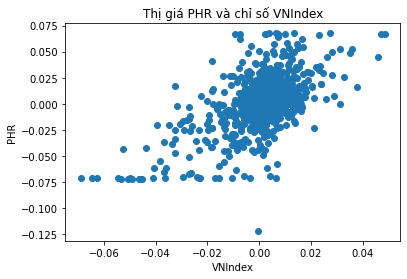

In [32]:
plt.scatter(x,y)
plt.ylabel('PHR')
plt.xlabel('VNIndex')
plt.title("Thị giá PHR và chỉ số VNIndex")

In [33]:
x1 = sm.add_constant(x)
x1

,const,VNIndex
Date,,
2019-10-11,1.0,0.004507
2019-10-14,1.0,0.001743
2019-10-15,1.0,-0.000524
2019-10-16,1.0,0.001419
2019-10-17,1.0,-0.004677
...,...,...
2022-10-04,1.0,-0.007669
2022-10-05,1.0,0.023938
2022-10-06,1.0,-0.027301


## Regression_Beta

In [34]:
results_reg_PHR = sm.OLS(y,x1).fit()

In [35]:
results_reg_PHR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PHR   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     413.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.61e-73
Time:                        11:40:08   Log-Likelihood:                 1813.8
No. Observations:                 750   AIC:                            -3624.
Df Residuals:                     748   BIC:                            -3614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.572      0.568      -0.002       0.001
VNIndex        1.1763      0.058     20.335      0.000       1.063       1.290
==============================================================================
Omnibus:                       46.101   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.542
Skew:                          -0.003   Prob(JB):                     2.80e-39
Kurtosis:                       5.384   Cond. No.                         73.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""